# Effects of Vinorelbine on gene expression in NSCLC cell lines
## Analysis performed by Hasan Alsharoh, M.D.

*Steps of analysis:*
1. Importing packages and defining dataframes
3. Visualization and correlation significance evaluation for all genes
4. Plotting all cell line data together
5. GSEA prep method of data
6. GSEA results

**GSEA databases utilized are available for examination at request to hasanalsharoh@gmail.com**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.stats.multitest as smt
from gseapy.plot import gseaplot
import gseapy as gp
from gseapy import barplot, dotplot

# Correlation coefficients

In [6]:
df1 = r"A549.txt" # files for ddCT data for all cell lines
df2 = r"CALU6.txt"
df3 = r"H1792.txt"
pdf1 = pd.read_csv(df1, sep='\t')
pdf2 = pd.read_csv(df2,sep='\t')
pdf3 = pd.read_csv(df3,sep='\t')

In [7]:
pdf1= pdf1.set_index('Sample name')
pdf2= pdf2.set_index('Sample Name')
pdf3= pdf3.set_index('Sample Name')

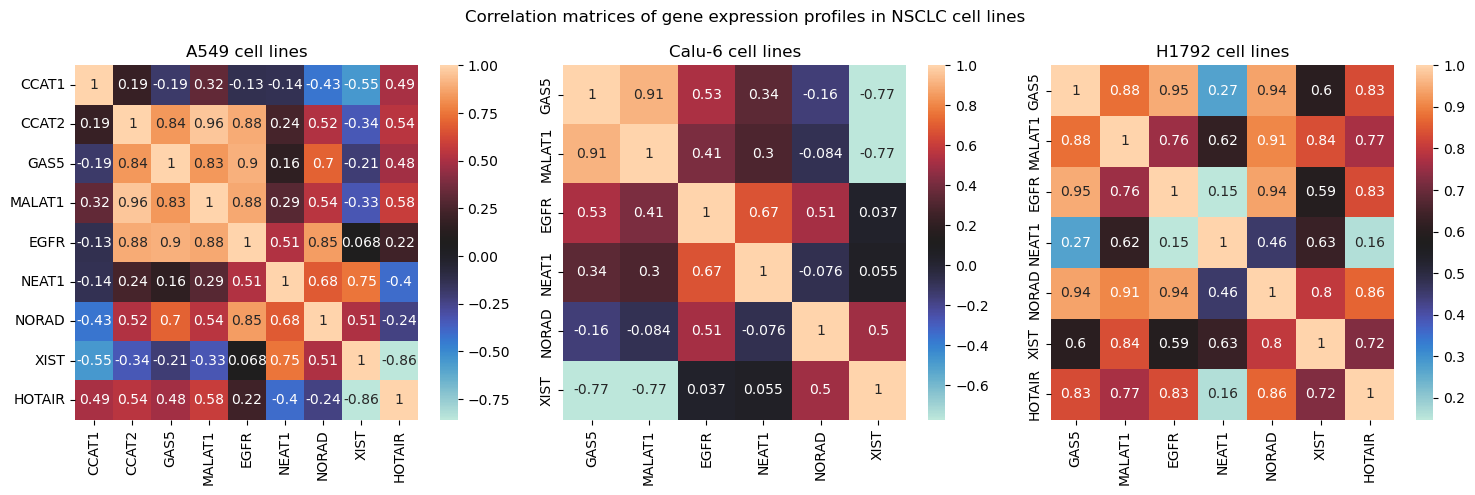

In [163]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed
sns.heatmap(pdf1.corr(), ax=axes[0], cmap="icefire", annot=True)
axes[0].set_title('A549 cell lines', wrap= True)
sns.heatmap(pdf2.corr(), ax=axes[1], cmap="icefire", annot= True)
axes[1].set_title('Calu-6 cell lines', wrap= True)
sns.heatmap(pdf3.corr(), ax=axes[2], cmap="icefire", annot= True)
axes[2].set_title('H1792 cell lines', wrap= True)
fig.suptitle('Correlation matrices of gene expression profiles in NSCLC cell lines')
plt.tight_layout()
plt.show()

# Volcano plot

In [13]:
a549['pval'] = pd.to_numeric(a549['pval'], errors='coerce')
a549['nlog10_pval'] = -np.log10(a549['pval'])
calu6['pval'] = pd.to_numeric(calu6['pval'], errors='coerce')
calu6['nlog10_pval'] = -np.log10(calu6['pval'])
h1792['pval'] = pd.to_numeric(h1792['pval'], errors='coerce')
h1792['nlog10_pval'] = -np.log10(h1792['pval'])

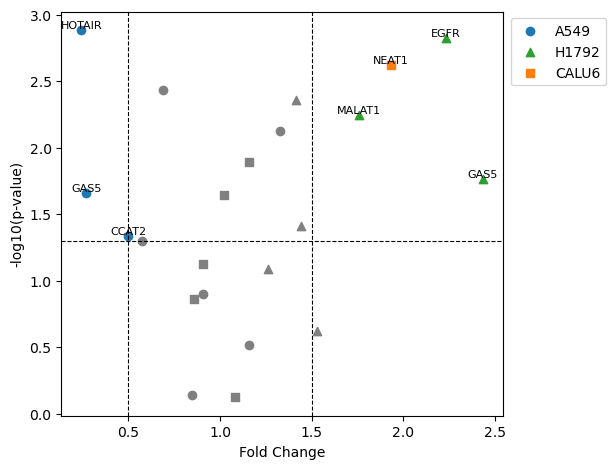

In [16]:
# dictionary for cell lines and shapes
sample_marker_styles = {
    'A549': 'o',     
    'CALU6': 's',   
    'H1792': '^',    
}
# figure
fig, ax = plt.subplots()
significance_threshold = 1.30102999566 #equivalent to p-value of 0.05
for sample, marker in sample_marker_styles.items():
    df = a549 if sample == 'A549' else calu6 if sample == 'CALU6' else h1792
    outside_range = (df['log2_fold_change'] < 0.5) | (df['log2_fold_change'] > 1.5)
    above_threshold = df['nlog10_pval'] >= significance_threshold
    ax.scatter(df.loc[outside_range & above_threshold, 'log2_fold_change'],
        df.loc[outside_range & above_threshold, 'nlog10_pval'],
        label=sample,
        marker=marker)
    ax.scatter(df.loc[~(outside_range & above_threshold), 'log2_fold_change'],
        df.loc[~(outside_range & above_threshold), 'nlog10_pval'],
        label=sample,
        marker=marker,
        color='grey')
    for _, row in df.loc[outside_range & above_threshold, ['log2_fold_change', 'nlog10_pval', 'Genes']].iterrows():
        ax.text(row['log2_fold_change'], row['nlog10_pval'], row['Genes'], fontsize=8, ha='center', va='bottom')
ax.set_xlabel('Fold Change')
ax.set_ylabel('-log10(p-value)')
ax.axvline(0.5, color='black', linestyle='--', linewidth=0.8)
ax.axvline(1.5, color='black', linestyle='--', linewidth=0.8)
ax.axhline(significance_threshold, color='black', linestyle='--', linewidth=0.8)
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
legend_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(legend_handles, unique_labels, bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

# Gene Set Enrichment Analysis (GSEA) preranking

In [17]:
df1=r"pa549.txt" # files with p-value for each of the cell lines
df2=r"pcalu6.txt"
df3=r"ph1792.txt"
pdf1=pd.read_csv(df1, sep='\t')
pdf2=pd.read_csv(df2,sep='\t')
pdf3=pd.read_csv(df3,sep='\t')

In [ ]:
# Code to prepare ranking A549 cell lines
means = pdf1[pdf1['Sample Name'].str.startswith('A549 VINO')].mean(numeric_only=True)
pdf1 = pdf1.append({'Sample Name': 'VINO Mean', **means}, ignore_index=True)
pdf1=pdf1.T
a549 = pd.DataFrame(zip(pdf1.index, pdf1[6],pdf1[7]), columns=['Genes','pval','ddct'])
a549 = a549[1:]
a549['log2_fold_change'] = 2 ** (-a549['ddct'])
p_values=a549['pval'].values
adjusted_pvalues=smt.multipletests(p_values, method='fdr_bh')[1]
a549['padj']=adjusted_pvalues
a549['padj']=pd.to_numeric(a549['padj'], errors='coerce')
a549['Rank'] = -np.log10(a549['padj']) * a549['log2_fold_change']
a549['Rank'] = pd.to_numeric(a549['Rank'], errors='coerce')
ranking1= a549[['Genes','Rank']].sort_values('Rank',ascending= False)
ranking1 = ranking1.reset_index(drop= True)
# Code to prepare ranking for Calu-6 cell lines
means = pdf2[pdf2['Sample Name'].str.startswith('Calu6 VINO')].mean(numeric_only=True)
pdf2 = pdf2.append({'Sample Name': 'VINO Mean', **means}, ignore_index=True)
pdf2=pdf2.T
calu6 = pd.DataFrame(zip(pdf2.index, pdf2[6],pdf2[7]), columns=['Genes','pval','ddct'])
calu6 = calu6[1:]
calu6['log2_fold_change'] = 2 ** (-calu6['ddct'])
p_values=calu6['pval'].values
adjusted_pvalues=smt.multipletests(p_values, method='fdr_bh')[1]
calu6['padj']=adjusted_pvalues
calu6['padj']=pd.to_numeric(calu6['padj'], errors='coerce')
calu6['Rank'] = -np.log10(calu6['padj']) * calu6['log2_fold_change']
calu6['Rank'] = pd.to_numeric(calu6['Rank'], errors='coerce')
ranking2= calu6[['Genes','Rank']].sort_values('Rank',ascending= False)
ranking2 = ranking2.reset_index(drop= True)
# Code to prepare ranking for H1792 cell lines
means = pdf3[pdf3['Sample Name'].str.startswith('H1792 VINO')].mean(numeric_only=True)
pdf3 = pdf3.append({'Sample Name': 'VINO Mean', **means}, ignore_index=True)
pdf3=pdf3.T
h1792 = pd.DataFrame(zip(pdf3.index, pdf3[6],pdf3[7]), columns=['Genes','pval','ddct'])
h1792 = h1792[1:]
h1792['log2_fold_change'] = 2 ** (-h1792['ddct'])
p_values=h1792['pval'].values
adjusted_pvalues=smt.multipletests(p_values, method='fdr_bh')[1]
h1792['padj']=adjusted_pvalues
h1792['padj']=pd.to_numeric(h1792['padj'], errors='coerce')
h1792['Rank'] = -np.log10(h1792['padj']) * h1792['log2_fold_change']
h1792['Rank'] = pd.to_numeric(h1792['Rank'], errors='coerce')
ranking3= h1792[['Genes','Rank']].sort_values('Rank',ascending= False)
ranking3 = ranking3.reset_index(drop= True)

In [9]:
ranking1

,Genes,Rank
0,XIST,2.183830
1,EGFR,1.225596
2,NORAD,0.717664
3,MALAT1,0.643029
4,CCAT2,0.558002
5,NEAT1,0.537249
6,HOTAIR,0.469694
7,GAS5,0.351708
8,CCAT1,0.121131


In [10]:
ranking2

,Genes,Rank
0,NEAT1,3.557859
1,XIST,1.641266
2,GAS5,1.367465
3,MALAT1,0.855960
4,NORAD,0.669765
5,EGFR,0.131455


In [11]:
ranking3

,Genes,Rank
0,EGFR,4.422475
1,GAS5,3.705745
2,MALAT1,3.303855
3,NORAD,2.657315
4,XIST,1.824824
5,HOTAIR,1.284942
6,NEAT1,0.946239


# GSEA preranked investigations

In [ ]:
geneset = # Gene sets used detailed below
pre_pres = gp.prerank (rnk= ranking3, gene_sets = geneset, min_size = 1) # ranking1-3 were iterated over all gene sets
out = []

for term in list(pre_pres.results):
    out.append([term,
               pre_pres.results[term]['fdr'],
               pre_pres.results[term]['es'],
               pre_pres.results[term]['nes'],
               pre_pres.results[term]['hits'],
               pre_pres.results[term]['matched_genes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes','hits','matched_genes']).sort_values('fdr').reset_index(drop = True)
out_df

# GSEA graphs

In [ ]:
t2g = out_df.iloc[0].Term
gseaplot(rank_metric= pre_pres.ranking, term = t2g, **pre_pres.results[t2g])